In [1]:
import numpy as np
import matplotlib.pyplot as plt
import fabio

In [2]:
from pygix.grazing_geometry import GrazingGeometry

ERROR:pygix.transform:Unable to import pyFAI.ocl_azim_csr: cannot import name 'ocl_azim_csr' from 'pyFAI' (C:\ProgramData\Anaconda3\envs\edgar\lib\site-packages\pyFAI\__init__.py)
ERROR:pygix.transform:Unable to import pyFAI.ocl_azim_lut for: cannot import name 'ocl_azim_lut' from 'pyFAI' (C:\ProgramData\Anaconda3\envs\edgar\lib\site-packages\pyFAI\__init__.py)
ERROR:pygix.transform:Unable to import pyFAI.ocl_sort for: cannot import name 'ocl_sort' from 'pyFAI' (C:\ProgramData\Anaconda3\envs\edgar\lib\site-packages\pyFAI\__init__.py)


In [3]:
geo = GrazingGeometry()

In [4]:
geo.load(
    r"C:\Users\edgar1993a\Work Folders\Documents\Python\pyxscat\edf_examples\test_NCD\Cr2O3.poni",
)

Detector Detector	 Spline= None	 PixelSize= 8.854e-05, 8.854e-05 m
Wavelength= 9.998726e-11 m
SampleDetDist= 2.195615e-01 m	PONI= 2.134776e-01, 6.657482e-03 m	rot1=-0.006725  rot2=-0.002436  rot3=0.000005 rad
DirectBeamDist= 219.567 mm	Center: x=91.868, y=2405.047 pix	Tilt= 0.410° tiltPlanRotation= -19.911° 𝛌= 1.000Å

In [5]:
geo.set_sample_orientation(3)

In [6]:
geo.get_shape()

[2880, 960]

In [7]:
geo.set_incident_angle(0.12)
geo.set_tilt_angle(0)

In [8]:
shape = (2880,960)

In [9]:
d2,d1 = np.meshgrid(
                np.linspace(1,shape[1],shape[1]),
                np.linspace(1,shape[0],shape[0]),
            )

In [10]:
data = fabio.open(r"C:\Users\edgar1993a\Work Folders\Documents\Python\pyxscat\edf_examples\test_NCD\A1\rayonix_A1_spitch_0.12_000_0000.edf").data

In [11]:
geo.set_incident_angle(0)

In [12]:
qx, qy, qz = geo.calc_q_xyz(d1, d2)
qx, qy, qz = qx*100, qy*100, qz*100
qxy = np.sqrt(qx ** 2 + qy ** 2) * np.sign(qy)
qxz = np.sqrt(qx ** 2 + qz ** 2) * np.sign(qz)

##### qx-qz

C:\Users\edgar1993a\AppData\Local\Temp\ipykernel_17756\3463827103.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(qx,qz, data, vmin=0, vmax=1000)


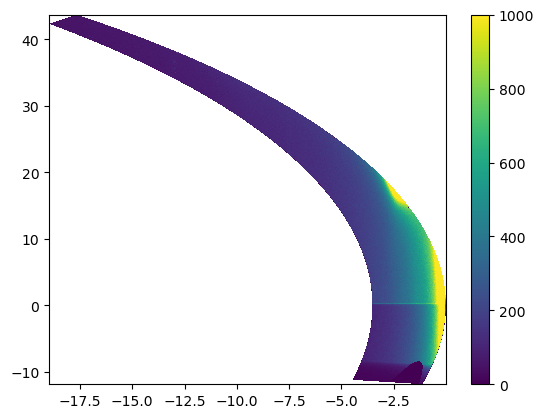

In [13]:
plt.pcolormesh(qx,qz, data, vmin=0, vmax=1000)
plt.colorbar()
plt.show()

##### qx-qy

C:\Users\edgar1993a\AppData\Local\Temp\ipykernel_24680\3893853014.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(qy,qx, data, vmin=0, vmax=500)


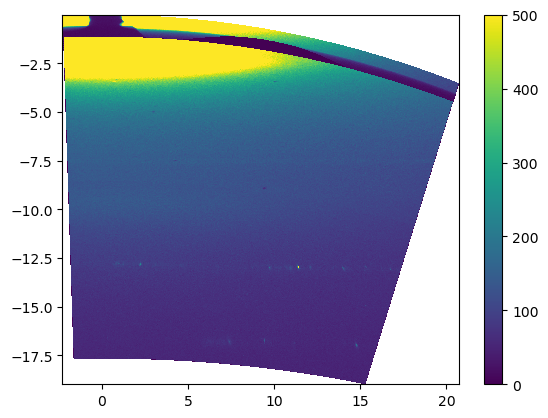

In [115]:
plt.pcolormesh(qy,qx, data, vmin=0, vmax=500)
plt.colorbar()
plt.show()

##### qy-qz

C:\Users\edgar1993a\AppData\Local\Temp\ipykernel_24680\1751338795.py:1: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(qy,qz, data, vmin=0, vmax=500)


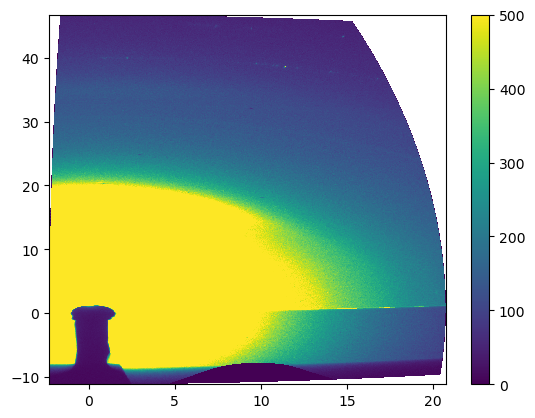

In [106]:
plt.pcolormesh(qy,qz, data, vmin=0, vmax=500)
plt.colorbar()
plt.show()

##### qxy-qz

C:\Users\edgar1993a\AppData\Local\Temp\ipykernel_24680\2568393723.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(qxy,qz, data, vmin=0, vmax=100)


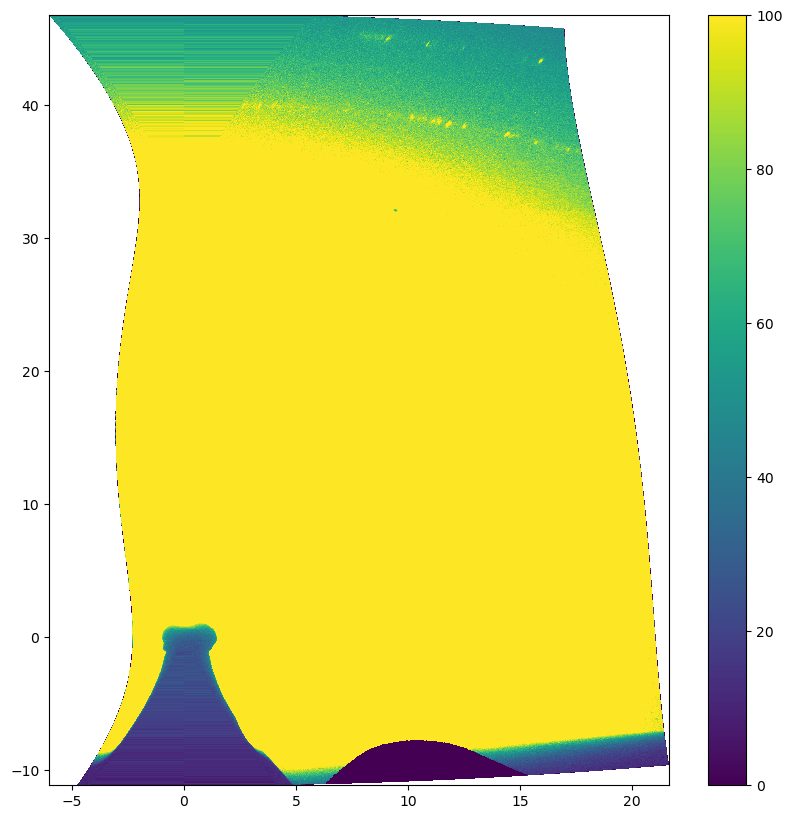

In [111]:
fig = plt.figure(figsize=(10,10))
plt.pcolormesh(qxy,qz, data, vmin=0, vmax=100)
plt.colorbar()
plt.show()

C:\Users\edgar1993a\AppData\Local\Temp\ipykernel_24680\2122156110.py:2: UserWarning: The input coordinates to pcolormesh are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolormesh.
  plt.pcolormesh(qy,qxz, data, vmin=0, vmax=1000)


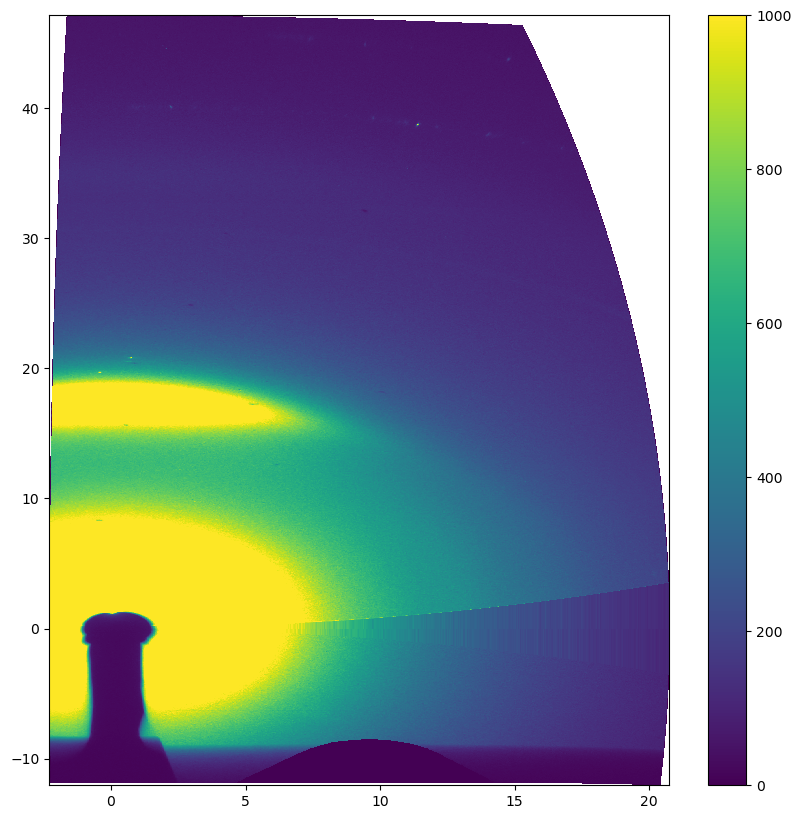

In [124]:
fig = plt.figure(figsize=(10,10))
plt.pcolormesh(qy,qxz, data, vmin=0, vmax=1000)
plt.colorbar()
plt.show()